Importons les librairies necessaires

In [ ]:
import pandas as pd
#importing relevant libraries for decision tree
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
#importing relevant libraries for RandomForest
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier #Importing Random Forest Classifier
from sklearn import metrics  # Importing metrics to test accuracy


In [ ]:
titanic= pd.read_csv('/content/titanic-passengers.csv')

In [ ]:
titanic

,PassengerId;Survived;Pclass;Name;Sex;Age;SibSp;Parch;Ticket;Fare;Cabin;Embarked
343;No;2;Collander,Mr. Erik Gustaf;male;28.0;0;0;248740;13.0;;S
76;No;3;Moen,Mr. Sigurd Hansen;male;25.0;0;0;348123;7.65;F...
641;No;3;Jensen,Mr. Hans Peder;male;20.0;0;0;350050;7.8542000...
568;No;3;Palsson,Mrs. Nils (Alma Cornelia Berglund);female;29....
672;No;1;Davidson,Mr. Thornton;male;31.0;1;0;F.C. 12750;52.0;B71;S
...,...
10;Yes;2;Nasser,Mrs. Nicholas (Adele Achem);female;14.0;1;0;2...
61;No;3;Sirayanian,Mr. Orsen;male;22.0;0;0;2669;7.2292;;C
535;No;3;Cacic,Miss. Marija;female;30.0;0;0;315084;8.6625;;S
"102;No;3;""Petroff","Mr. Pastcho (""""Pentcho"""")"";male;;0;0;349215;7..."


In [ ]:
# Enlevons la séparation par le point virgule
titanic=pd.read_csv("/content/titanic-passengers.csv", sep=";")

In [ ]:
titanic.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,343,No,2,"Collander, Mr. Erik Gustaf",male,28.0,0,0,248740,13.0000,NaN,S
1,76,No,3,"Moen, Mr. Sigurd Hansen",male,25.0,0,0,348123,7.6500,F G73,S
2,641,No,3,"Jensen, Mr. Hans Peder",male,20.0,0,0,350050,7.8542,NaN,S
3,568,No,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",female,29.0,0,4,349909,21.0750,NaN,S
4,672,No,1,"Davidson, Mr. Thornton",male,31.0,1,0,F.C. 12750,52.0000,B71,S
5,105,No,3,"Gustafsson, Mr. Anders Vilhelm",male,37.0,2,0,3101276,7.9250,NaN,S
6,576,No,3,"Patchett, Mr. George",male,19.0,0,0,358585,14.5000,NaN,S
7,382,Yes,3,"Nakid, Miss. Maria (""Mary"")",female,1.0,0,2,2653,15.7417,NaN,C
8,228,No,3,"Lovell, Mr. John Hall (""Henry"")",male,20.5,0,0,A/5 21173,7.2500,NaN,S
9,433,Yes,2,"Louch, Mrs. Charles Alexander (Alice Adelaide ...",female,42.0,1,0,SC/AH 3085,26.0000,NaN,S


In [ ]:
titanic.shape

(891, 12)

In [ ]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    object 
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(4), object(6)
memory usage: 83.7+ KB


In [ ]:
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

On a trois variables qui ont des données manquantes:

la variable Age , donc on peut l'imputation de la moyenne ou la medianne

pour la variable Cabin, on pourra utiliser la methode d'encoding

Pour la variable emnarked on peut les supprimer avec la methode drop puisque leur proportion est faible par rapport l'ensemble

In [ ]:
#Pour remplacer nos valeurs manquantes, on utilise l'imputation de la moyenne
titanic['Age'].fillna(titanic['Age'].mean(), inplace=True)

In [ ]:
#Utilisons la fonction d'encodeur d'etiquette  dans la bibliotheque Sklearn pour transformer les variavbles categorielles manquantes
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
titanic['Cabin']=encoder.fit_transform(titanic["Cabin"])

In [ ]:
titanic.dropna(axis=0, inplace=True)

In [ ]:
titanic.isnull().sum().sum()

0

Meilleure methode

In [ ]:
#Preprocessing our data
def preprocess_data(new_data):
    new_data['Age'].fillna(new_data['Age'].mean(),inplace=True)
    new_data.replace({'Sex':{'male': 1,'female':0}},inplace=True)
    new_data['Cabin']=new_data.Cabin.fillna('G6')
    new_data.replace({'Survived':{'Yes': 1,'No':0}},inplace=True)
    return new_data
data=preprocess_data(titanic)

In [ ]:
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,343,0,2,"Collander, Mr. Erik Gustaf",1,28.000000,0,0,248740,13.0000,147,S
1,76,0,3,"Moen, Mr. Sigurd Hansen",1,25.000000,0,0,348123,7.6500,140,S
2,641,0,3,"Jensen, Mr. Hans Peder",1,20.000000,0,0,350050,7.8542,147,S
3,568,0,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",0,29.000000,0,4,349909,21.0750,147,S
4,672,0,1,"Davidson, Mr. Thornton",1,31.000000,1,0,F.C. 12750,52.0000,38,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",0,14.000000,1,0,237736,30.0708,147,C
887,61,0,3,"Sirayanian, Mr. Orsen",1,22.000000,0,0,2669,7.2292,147,C
888,535,0,3,"Cacic, Miss. Marija",0,30.000000,0,0,315084,8.6625,147,S
889,102,0,3,"Petroff, Mr. Pastcho (""Pentcho"")",1,29.699118,0,0,349215,7.8958,147,S


In [ ]:
data.isnull().sum().sum()

0

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

<ipython-input-227-b31ce8a6fa54>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corrmat = data.corr()


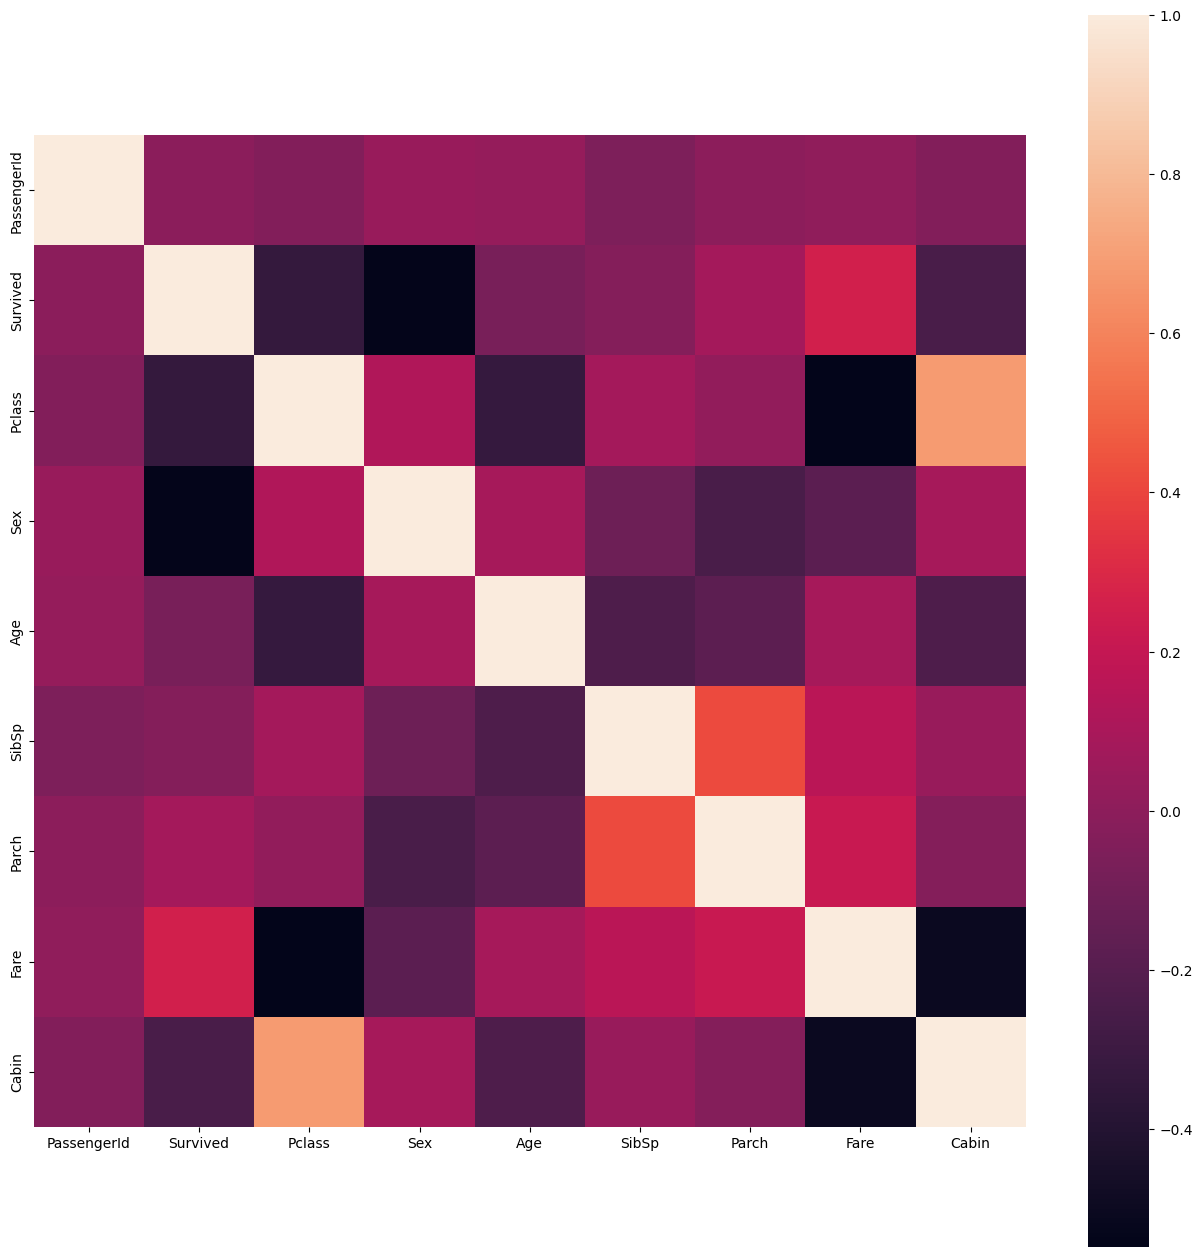

In [ ]:
corrmat = data.corr()
plt.subplots(figsize=(16, 16))
sns.heatmap(corrmat, square=True);

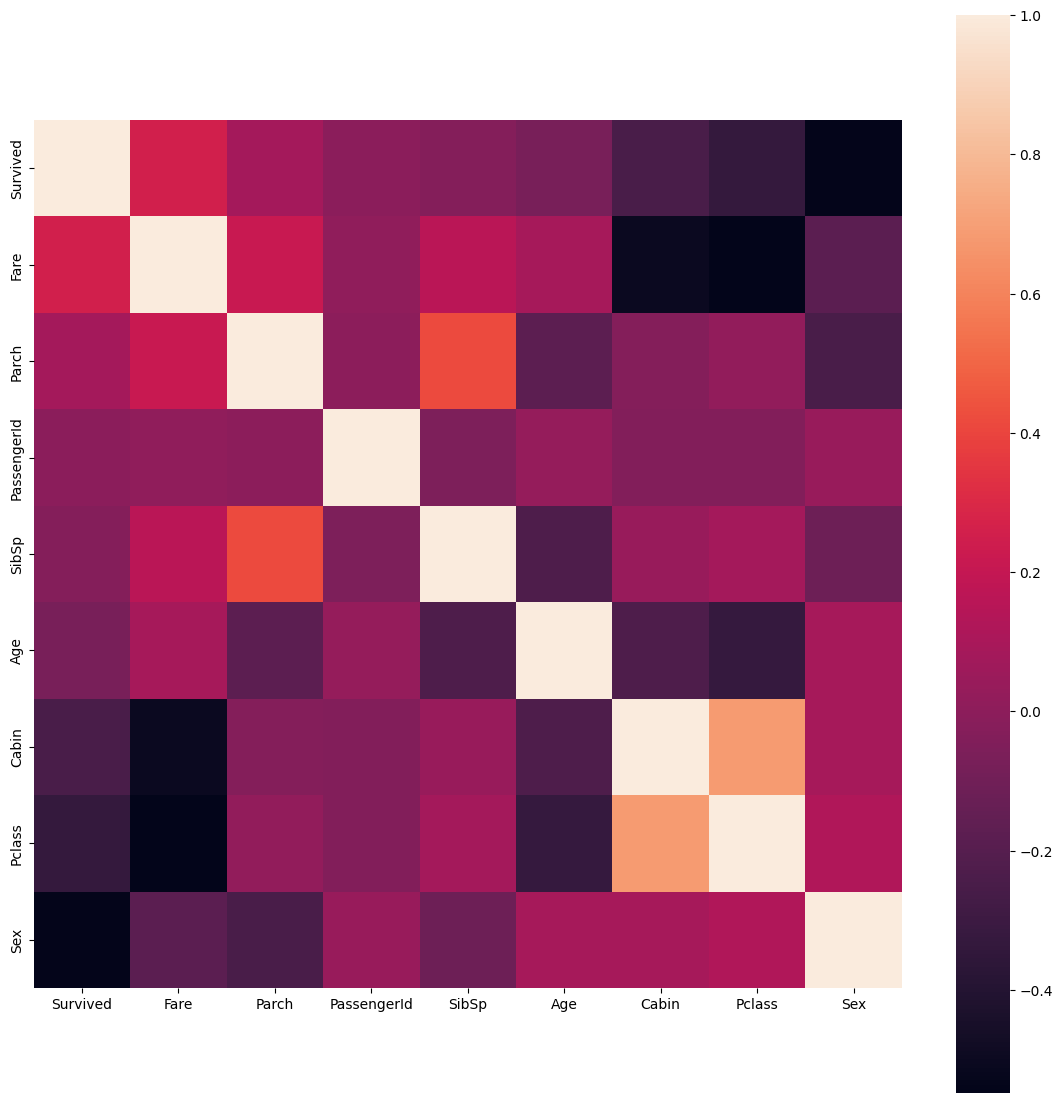

In [ ]:
k =12#number of variables for heatmap
cols = corrmat.nlargest(k, 'Survived')['Survived'].index
plt.subplots(figsize=(14, 14))
sns.heatmap(data[cols].corr(), square=True);

On voit les variables "Name", "Cabin", "Ticket", "Embarked" ne figurent sur la matrice de correlation. Donc on peut supprimer ces colonnes

#1. Lisons notre ensemble de données Titanic comme d'habitude : créeons un ensemble d'entraînement et un ensemble de tests, puis appliquons l'arbre de décision.


In [ ]:
x=data.drop(["Survived", "Name", "Cabin", "Ticket", "Embarked"], axis=1)
y= data["Survived"]

#splitting data
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.20,random_state=10)

#applying tree algorithm
tree = tree.DecisionTreeClassifier()
tree.fit(x_train, y_train)   #fitting our model
y_pred=tree.predict(x_test)   # evaluating our model
print("score:{}".format(accuracy_score(y_test, y_pred)))

score:0.7303370786516854


#2. Traçons notre arbre de décision et essayons de lire les branches de l'arbre et concluons sur  la prédiction manuellement.



Disons que nous voulons créer un classificateur si un passager a survécu ou non en utilisant deux variables : l'âge et le tarif (prix d'un billet). Nous souhaitons créer un arbre de décision simple pour accomplir cette tâche.

In [ ]:
dd = data[['Survived', 'Fare', 'Age']].copy()

# Droping missing entries
dd.dropna(inplace=True)

In [ ]:
print(f"Number of observations: {dd.shape[0]}")

Number of observations: 889


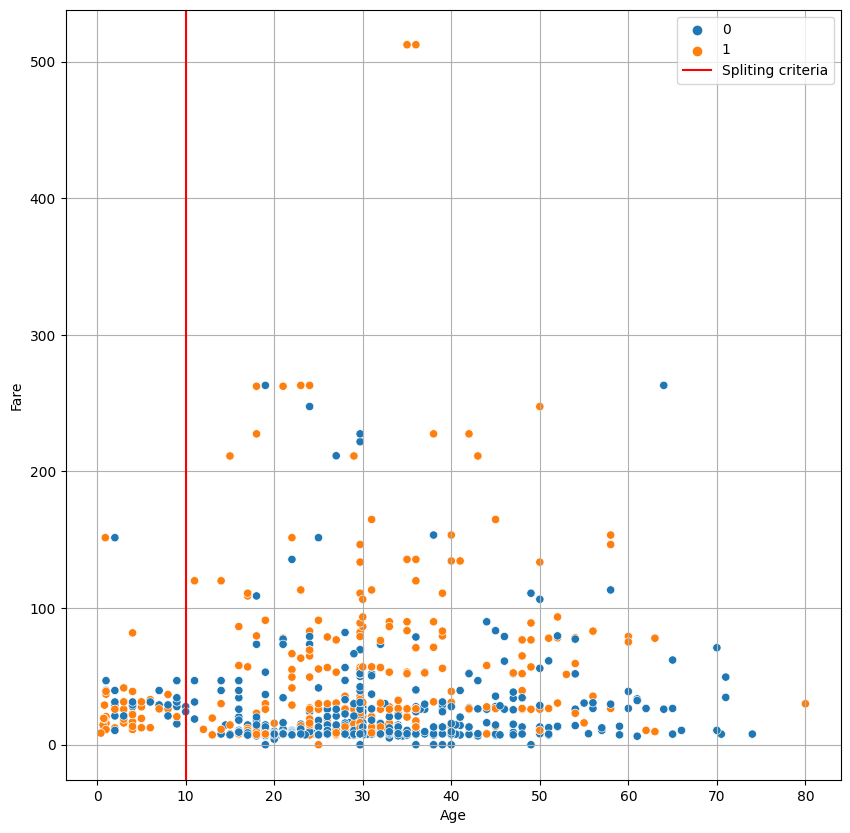

In [ ]:
# Define the split value
age_split = 10

# Ploting the original plot
plt.figure(figsize=(10, 10))
sns.scatterplot(y='Fare', x='Age', data=dd, hue='Survived')
plt.grid()

# Adding the vertical line
plt.axvline(age_split, label='Spliting criteria', color='red')
plt.legend()
plt.show()

In [ ]:
# Getting the left and right datasets
left = dd[dd['Age']<=age_split]
right = dd[dd['Age']>age_split]

In [ ]:
print(f"Observations to the left of criteria: {left.shape[0]}")
print(f"Observations to the right of criteria: {right.shape[0]}")

Observations to the left of criteria: 64
Observations to the right of criteria: 825


In [ ]:
left.groupby('Survived', as_index=False).size()

,Survived,size
0,0,26
1,1,38


In [ ]:
right.groupby('Survived', as_index=False).size()

,Survived,size
0,0,523
1,1,302


Il existe des observations des deux classes dans les nœuds. Ainsi, chacun des nœuds est impur. Mais à quel point est-il impur ? Pour mesurer les impuretés, nous utilisons le coefficient d'impureté GINI.

#3. Modifions les paramètres de l'arbre de décision (au moins deux paramètres).


In [ ]:
# Dropping missing values
dtree = data[['Survived', 'Age', 'Fare']].dropna().copy()

# Defining the X and Y matrices
Y = dtree['Survived'].values
X = dtree[['Age', 'Fare']]

# Saving the feature list
features = list(X.columns)

In [ ]:
features

['Age', 'Fare']

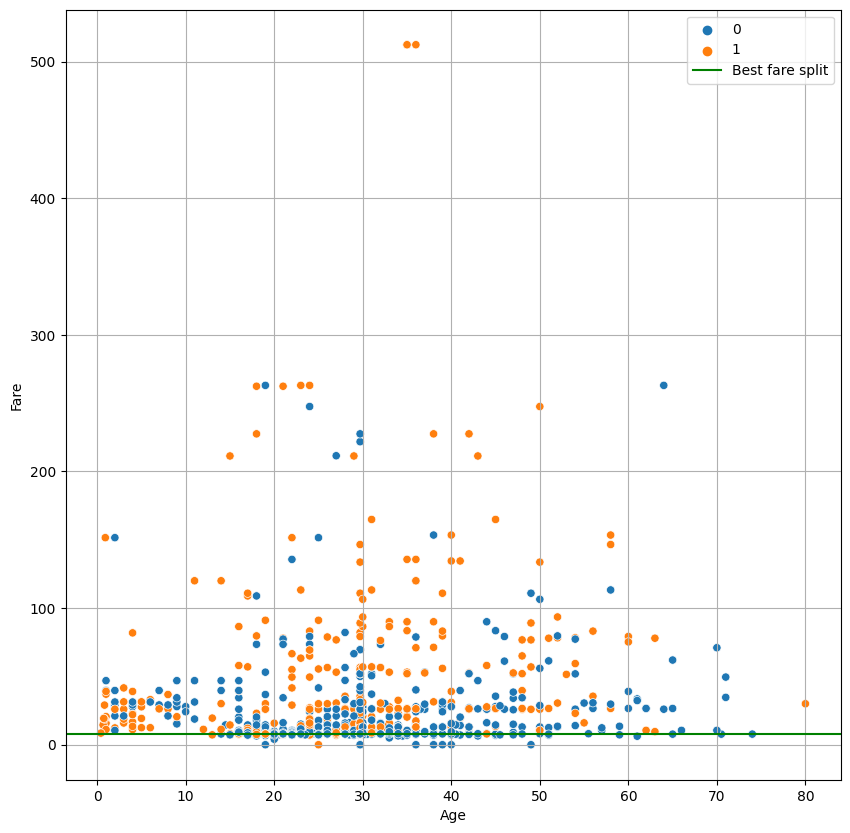

In [ ]:
# Define the split value
age_split = 8

# Ploting the original plot
plt.figure(figsize=(10, 10))
sns.scatterplot(y='Fare', x='Age', data=dd, hue='Survived')
plt.grid()

# Adding the split line
plt.axhline(age_split, label='Best fare split', color='green')
plt.legend()

In [ ]:
# Getting the left and right datasets
left = dd[dtree['Age']<=age_split]
right = dd[dtree['Age']>age_split]

In [ ]:
print(f"Observations to the left of criteria: {left.shape[0]}")
print(f"Observations to the right of criteria: {right.shape[0]}")

Observations to the left of criteria: 54
Observations to the right of criteria: 835


In [ ]:
left.groupby('Survived', as_index=False).size()

,Survived,size
0,0,18
1,1,36


In [ ]:
right.groupby('Survived', as_index=False).size()

,Survived,size
0,0,531
1,1,304


In [ ]:
left = dd[dtree['Fare']<=age_split]
right = dd[dtree['Fare']>age_split]

In [ ]:
print(f"Observations to the left of criteria: {left.shape[0]}")
print(f"Observations to the right of criteria: {right.shape[0]}")

Observations to the left of criteria: 241
Observations to the right of criteria: 648


In [ ]:
left.groupby('Survived', as_index=False).size()

,Survived,size
0,0,189
1,1,52


In [ ]:
right.groupby('Survived', as_index=False).size()

,Survived,size
0,0,360
1,1,288


#4. Calculons la nouvelle précision et comparons la avec les résultats précédents.


In [ ]:
# Dropping missing values
dtree = data[['Survived', 'Age', 'Fare']].dropna().copy()

# Defining the X and Y matrices
Y = dtree['Survived'].values
X = dtree[['Age', 'Fare']]
#splitting data
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.20,random_state=10)
#applying tree algorithm
tree.fit(X_train, Y_train)   #fitting our model
Y_pred=tree.predict(X_test)   # evaluating our model
print("score:{}".format(accuracy_score(Y_test, Y_pred)))

score:0.6235955056179775


#5. Utilisons une forêt aléatoire puis modifions le nombre d'estimateurs.


In [ ]:
from sklearn import datasets
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier #Importing Random Forest Classifier
from sklearn import metrics  # Importing metrics to test accuracy

In [ ]:
clf=RandomForestClassifier(n_estimators=5)  #Creating a random forest with 100 decision trees
clf.fit(X_train, Y_train)  #Training our model
Y_pred=clf.predict(X_test)  #testing our model

In [ ]:
clf=RandomForestClassifier(n_estimators=5)  #Creating a random forest with 100 decision trees
clf.fit(x_train, y_train)  #Training our model
y_pred=clf.predict(x_test)  #testing our model

#6. Calculons la nouvelle précision et comparons-la avec le résultat précédent.

In [ ]:
print("Accuracy:", metrics.accuracy_score(Y_test, Y_pred))  #Measuring the accuracy of our model

Accuracy: 0.6573033707865169


In [ ]:
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))  #Measuring the accuracy of our model

Accuracy: 0.7808988764044944


En comprant les methodes decision tree et random forest:

On remarque que le random forest est plus performant  que la decision tree en terme de precison

Car avec un seul feature pour

Pour la decision on a un score 62%( 10estimateurs)

Pour le random Forest on a un score 65%( 5estimateurs)

Avec moins de 2 features

Pour la decision tree, on a 73%( 10estimateurs)

Pour le random forest , on a 78%( 5estimateurs)